# Case Study: Sentiment Analysis of Yelp Review Ratings

<img src="https://raw.githubusercontent.com/josefftan/josefftan.github.io/master/assets/img/portfolio/yelp.png" alt="Girl in a jacket" width="500" height="250" />

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Case-Study:-Sentiment-Analysis-of-Yelp-Review-Ratings" data-toc-modified-id="Case-Study:-Sentiment-Analysis-of-Yelp-Review-Ratings-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Case Study: Sentiment Analysis of Yelp Review Ratings</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Libraries-and-Dataset-Importation" data-toc-modified-id="Libraries-and-Dataset-Importation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Libraries and Dataset Importation</a></span></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Exploration</a></span></li><li><span><a href="#Data-Visualization" data-toc-modified-id="Data-Visualization-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data Visualization</a></span></li><li><span><a href="#Data-Pre-processing" data-toc-modified-id="Data-Pre-processing-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Data Pre-processing</a></span></li><li><span><a href="#More-Data-Pre-processing" data-toc-modified-id="More-Data-Pre-processing-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>More Data Pre-processing</a></span></li><li><span><a href="#Model-Creation" data-toc-modified-id="Model-Creation-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Model Creation</a></span></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Model Evaluation</a></span></li><li><span><a href="#Conclusion:" data-toc-modified-id="Conclusion:-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Conclusion:</a></span></li></ul></div>

# Introduction

Yelp is an app that helps people to connect and write reviews to local businesses. In this project, Natural Language Processing (NLP) strategies will be used to analyze and classify their reviews whether if it is a bad or good review.

**Problem:**
 - To assess the public perception of restaurants on Yelp via exploratory data analysis
 - To build a machine learning model which accurately predicts the sentiment of reviews
 
**Dataset:**
 - Number of 'stars' indicate the business rating given by a customer, ranging from 1 to 5
 - 'Cool', 'Useful' and 'Funny' indicate the number of cool votes given by other Yelp Users.
 
**Source:**
 - This dataset is a subset of Yelp's businesses, reviews, and user data.

# Libraries and Dataset Importation

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Import dataset
df = pd.read_csv('project_data/yelp.csv')
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


# Data Exploration

In [3]:
# Check the dataset shape
df.shape

(10000, 10)

In [4]:
# Check the dataset description
df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [5]:
# Check more info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [6]:
df.isnull().mean()

business_id    0.0
date           0.0
review_id      0.0
stars          0.0
text           0.0
type           0.0
user_id        0.0
cool           0.0
useful         0.0
funny          0.0
dtype: float64

In [7]:
# Check the first text comment
df['text'][0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

In [8]:
# Check more text comment
df['text'][500]

"Hands down my favorite coffee shop in town. They used to be located inside the Conspire art collective but have now moved into the old Hood Rides digs up the block and it's awesome.\n\nPlenty of seating room at the bar and also a really cool little room next door  where you can pull up a seat and hang out. From what I understand there will be seating outside too.\n\nMost importantly however is the coffee. They use a special mix roasted specially by Cartel. I'll be the first to admit I'm no coffee connoisseur but I do know this, every drink I've had, no matter who's behind the bar has been perfect. Not burnt, not too sweet, and not a hint of pretentiousness.\n\nSooooo, why go to S-word Bucks when you can get a better cup of coffee up the street. Oh and for those of us who burn the midnight oil on more than a few occasions, they're open until 12am EVERY night."

In [9]:
# Check more comment
df['text'][999]

"IKEA is so much fun. It's a little bit of a walk up and down the store but with all the different items on display there is time to sit and relax on the chairs, couches, beds. I love walking around the store looking a new ideas for my own home. They have very good prices on all household items. When shopping for accessories for the house I highly recommend going to IKEA because you are bound to find something. Simple things such as Tupperware, trash cans, bathroom accessories can all be found at a really good price."

# Data Visualization

In [10]:
# Add lenght column in the dataframe 
df['length'] = df['text'].apply(len)

In [11]:
# Check dataframe
df.head(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345


In [12]:
# Check the longest text
df[df['length'] == 4997]['text'].iloc[0]

'In our continuing quest to identify cool, locally owned places to eat and/or drink, Caroline and I auditioned Vintage 95 last night. \n\nBefore I go further, understand that whenever I go out for eats or drinks, I have  in  mind a Platonic Ideal of the Bar/Pub/Eatery I most want to frequent. I\'m on a constant quest to find that  Ideal expressed in Real Life. \n\nVintage 95 isn\'t quite there, but it\'s damn close. If I ever give something Five Stars, you\'ll know it has pegged my Platonic Ideal. Anyway...\n\nThe plan last night was for drinks. No plans for food, just Adult Beverages and warm conversation. But it turned into more.\n\nThe location in downtown Chandler is terrific for us. The owners have created a very fine visual experience - leather, stone, dark woods, good lighting. And they don\'t have the music turned up so loud that you CANNOT HAVE A CONVERSATION. This is one of my pet peeves. If I want to stare at people move their mouths while enduring an aural assault, I\'ll st

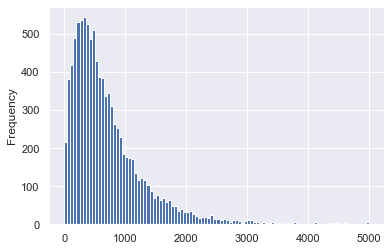

In [13]:
# Visualize the occurence of reviews
df['length'].plot(bins = 100, kind = 'hist')

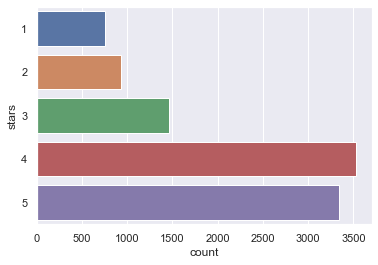

In [14]:
# Check the count plot in stars column
sns.countplot(y = 'stars', data = df)
plt.show()

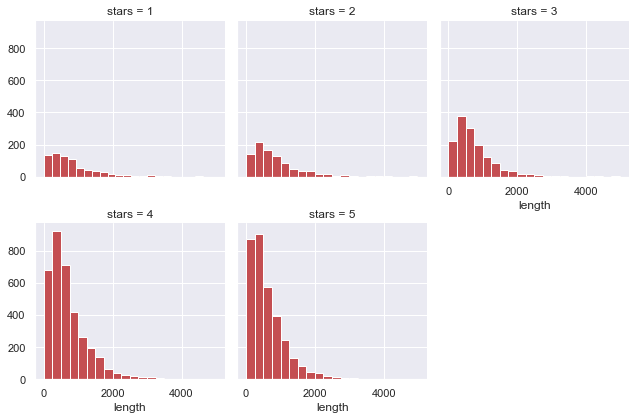

In [15]:
# Create a facegrid for stars and length
g = sns.FacetGrid(data = df, col = 'stars', col_wrap = 3)
g.map(plt.hist, 'length', bins = 20, color = 'r')
plt.show()

In [16]:
# Check the 1 star reviews
df_1 = df[df['stars'] == 1]
df_1.head(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
23,IJ0o6b8bJFAbG6MjGfBebQ,2010-09-05,Dx9sfFU6Zn0GYOckijom-g,1,U can go there n check the car out. If u wanna...,review,zRlQEDYd_HKp0VS3hnAffA,0,1,1,594
31,vvA3fbps4F9nGlAEYKk_sA,2012-05-04,S9OVpXat8k5YwWCn6FAgXg,1,Disgusting! Had a Groupon so my daughter and ...,review,8AMn6644NmBf96xGO3w6OA,0,1,0,361


In [17]:
# Check the 5 stars reviews
df_5 = df[df['stars'] == 5]
df_5.head(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345


In [18]:
# join the two dataframe
df_15 = pd.concat([df_1, df_5])
df_15

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
23,IJ0o6b8bJFAbG6MjGfBebQ,2010-09-05,Dx9sfFU6Zn0GYOckijom-g,1,U can go there n check the car out. If u wanna...,review,zRlQEDYd_HKp0VS3hnAffA,0,1,1,594
31,vvA3fbps4F9nGlAEYKk_sA,2012-05-04,S9OVpXat8k5YwWCn6FAgXg,1,Disgusting! Had a Groupon so my daughter and ...,review,8AMn6644NmBf96xGO3w6OA,0,1,0,361
35,o1GIYYZJjM6nM03fQs_uEQ,2011-11-30,ApKbwpYJdnhhgP4NbjQw2Q,1,"I've eaten here many times, but none as bad as...",review,iwUN95LIaEr75TZE_JC6bg,0,4,3,1198
61,l4vBbCL9QbGiwLuLKwD_bA,2011-11-22,DJVxOfj2Rw9zklC9tU3i1w,1,I have always been a fan of Burlington's deals...,review,EPROVap0M19Y6_4uf3eCmQ,0,0,0,569
64,CEswyP-9SsXRNLR9fFGKKw,2012-05-19,GXj4PNAi095-q9ynPYH3kg,1,Another night meeting friends here. I have to...,review,MjLAe48XNfYlTeFYca5gMw,0,1,2,498
...,...,...,...,...,...,...,...,...,...,...,...
9990,R8VwdLyvsp9iybNqRvm94g,2011-10-03,pcEeHdAJPoFNF23es0kKWg,5,Yes I do rock the hipster joints. I dig this ...,review,b92Y3tyWTQQZ5FLifex62Q,1,1,1,263
9991,WJ5mq4EiWYAA4Vif0xDfdg,2011-12-05,EuHX-39FR7tyyG1ElvN1Jw,5,Only 4 stars? \n\n(A few notes: The folks that...,review,hTau-iNZFwoNsPCaiIUTEA,1,1,0,908
9992,f96lWMIAUhYIYy9gOktivQ,2009-03-10,YF17z7HWlMj6aezZc-pVEw,5,I'm not normally one to jump at reviewing a ch...,review,W_QXYA7A0IhMrvbckz7eVg,2,3,2,1326
9994,L3BSpFvxcNf3T_teitgt6A,2012-03-19,0nxb1gIGFgk3WbC5zwhKZg,5,Let's see...what is there NOT to like about Su...,review,OzOZv-Knlw3oz9K5Kh5S6A,1,2,1,1968


In [19]:
# Check more info
df_15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 23 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  4086 non-null   object
 1   date         4086 non-null   object
 2   review_id    4086 non-null   object
 3   stars        4086 non-null   int64 
 4   text         4086 non-null   object
 5   type         4086 non-null   object
 6   user_id      4086 non-null   object
 7   cool         4086 non-null   int64 
 8   useful       4086 non-null   int64 
 9   funny        4086 non-null   int64 
 10  length       4086 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


In [20]:
# Check 1 star percentage
print('1 Star Review Percentage = ', (len(df_1) / len(df_15) ) *100, '%')

1 Star Review Percentage =  18.330885952031327 %


In [21]:
# Check 5 star percentage
print('5 Star Review Percentage = ', (len(df_5) / len(df_15) ) *100, '%')

5 Star Review Percentage =  81.66911404796868 %


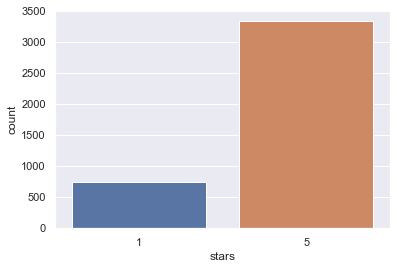

In [22]:
sns.countplot(df_15['stars'], label = 'count')
plt.show()

# Data Pre-processing

In [23]:
# Import string to check string punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
# Create a test sample
Test = 'Hello joseff, I am so happy learning AI now!!'

In [25]:
# Remove unnecessary punctuation in the test sample
Test_punc_removed = [ char for char in Test if char not in string.punctuation]

In [26]:
# Check test sample
Test_punc_removed

['H',
 'e',
 'l',
 'l',
 'o',
 ' ',
 'j',
 'o',
 's',
 'e',
 'f',
 'f',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 's',
 'o',
 ' ',
 'h',
 'a',
 'p',
 'p',
 'y',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'A',
 'I',
 ' ',
 'n',
 'o',
 'w']

In [27]:
# Join the test sample
Test_punc_removed_join = ''.join(Test_punc_removed)

In [28]:
# Check the connected test sample
Test_punc_removed_join

'Hello joseff I am so happy learning AI now'

In [29]:
# Import stopwords for cleaning
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [30]:
# Create a function to get only the important features
Test_punc_removed_join_clean = [ word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')] 

In [31]:
# Check the cleaned test sample
Test_punc_removed_join_clean

['Hello', 'joseff', 'happy', 'learning', 'AI']

In [32]:
# Turn the words to numbers by CountVectorizer
sample_data = ['Hello joseff, I am so happy learning AI now!!', 'joseff is so cute', 'AI is love']

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [33]:
# Get the important features 
print(vectorizer.get_feature_names())

['ai', 'am', 'cute', 'happy', 'hello', 'is', 'joseff', 'learning', 'love', 'now', 'so']


In [34]:
# Check the equivalent number value
print(X.toarray())

[[1 1 0 1 1 0 1 1 0 1 1]
 [0 0 1 0 0 1 1 0 0 0 1]
 [1 0 0 0 0 1 0 0 1 0 0]]


# More Data Pre-processing

In [35]:
# Create preprocessing function
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [ word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [36]:
# Check cleaned data
Test_punc_removed_join_clean

['Hello', 'joseff', 'happy', 'learning', 'AI']

In [37]:
# Initiate cleaning data
df_clean = df_15['text'].apply(message_cleaning)

In [38]:
# Original review
print(df_15['text'][0])

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [39]:
# Cleaned review
print(df_clean[0])

['wife', 'took', 'birthday', 'breakfast', 'excellent', 'weather', 'perfect', 'made', 'sitting', 'outside', 'overlooking', 'grounds', 'absolute', 'pleasure', 'waitress', 'excellent', 'food', 'arrived', 'quickly', 'semibusy', 'Saturday', 'morning', 'looked', 'like', 'place', 'fills', 'pretty', 'quickly', 'earlier', 'get', 'better', 'favor', 'get', 'Bloody', 'Mary', 'phenomenal', 'simply', 'best', 'Ive', 'ever', 'Im', 'pretty', 'sure', 'use', 'ingredients', 'garden', 'blend', 'fresh', 'order', 'amazing', 'EVERYTHING', 'menu', 'looks', 'excellent', 'white', 'truffle', 'scrambled', 'eggs', 'vegetable', 'skillet', 'tasty', 'delicious', 'came', '2', 'pieces', 'griddled', 'bread', 'amazing', 'absolutely', 'made', 'meal', 'complete', 'best', 'toast', 'Ive', 'ever', 'Anyway', 'cant', 'wait', 'go', 'back']


In [40]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# fit CountVectorizer to the dataset
vectorizer = CountVectorizer( analyzer = message_cleaning)
df_countvectorizer = vectorizer.fit_transform(df_15['text'])

In [41]:
# Check vectorized dataset
print(vectorizer.get_feature_names())

['0', '00s', '01042012', '022010', '03342', '05', '050', '06', '07092008', '075', '09', '090', '095', '1', '10', '100', '1000', '10000', '1000am', '1000pm', '1000x', '1001', '100150', '1007', '100s', '100th', '101', '1011', '1012', '101412', '1015', '102', '1025', '1030', '103011', '1030pm', '10312012', '105', '105°', '1070', '108', '109', '1095', '1099', '10Shrimp', '10X', '10am', '10am4pm', '10close', '10each', '10gallon', '10ish', '10min', '10mins', '10minutes', '10person', '10pm', '10pm12am', '10th', '10thand', '10yard', '10yo', '11', '110', '1100', '1100am', '1103', '111', '1113', '1115', '1118', '111807', '111809', '111909', '111PM', '111th', '112', '112312', '1125', '1130', '1130am', '1135', '1139', '114', '1141', '1145', '115', '1150', '1152', '1154', '1155', '115th', '116', '118', '1182010', '1199', '11991079', '11AM', '11PM', '11a3p', '11am', '11ish', '11person', '11pm', '12', '120', '1200', '12000', '1205', '1207', '120year', '121007', '121107', '121207', '1213', '121407', '

In [42]:
# Check df_countvectorizer in array format
print(df_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [43]:
# df_countvectorizer dimension
df_countvectorizer.shape

(4086, 26435)

# Model Creation

In [51]:
# Label the indepedent and dependent variable
X = df_countvectorizer
y = df_15['stars'].values

In [52]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 )

In [53]:
# Check the train dataset shape
X_train.shape, y_train.shape

((3268, 26435), (3268,))

In [54]:
# Check the test dataset shape
X_test.shape, y_test.shape

((818, 26435), (818,))

In [55]:
# Fit the dataset into the model
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

# Model Evaluation

In [56]:
# Import evaluation libraries
from sklearn.metrics import classification_report, confusion_matrix

# Initiate prediction for training dataset
y_predict_train = NB_classifier.predict(X_train)
y_predict_train

array([5, 5, 5, ..., 5, 1, 5], dtype=int64)

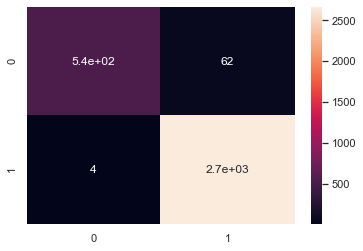

In [57]:
# Check confusion matrix for training dataset
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot = True)
plt.show()

In [58]:
# Initiate prediction for testing dataset
y_predict_test = NB_classifier.predict(X_test)
y_predict_test

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 1, 1, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 1, 5, 5, 5, 5,
       5, 5, 1, 5, 5, 1, 5, 5, 5, 1, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5,
       5, 1, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 1, 1, 5, 5, 5, 5, 5, 5,
       5, 5, 1, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 1, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 1, 5, 5, 1,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 1,
       5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 1, 1, 5, 1, 5, 1, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 1, 5, 5, 5,
       5, 5, 5, 5, 1, 5, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 1, 1,

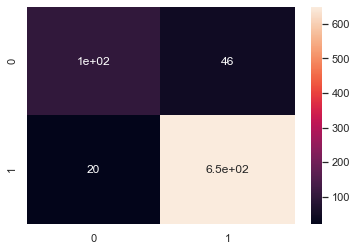

In [59]:
# Check confusion matrix for training dataset
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)
plt.show()

In [60]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           1       0.84      0.69      0.76       149
           5       0.93      0.97      0.95       669

    accuracy                           0.92       818
   macro avg       0.89      0.83      0.85       818
weighted avg       0.92      0.92      0.92       818



# Conclusion:

The Naive Bayes model were able to achieved an accuracy of 92%. This model would summarize the reviews in their business to let the owners have more time and focus more in what really matter most. As a business owner it would be reasonable to wonder what aspects of the services provided are viewed as negative or positive by customers.